### Problem formulation

1. Create a Segmentation with customers who behave the same
2. Investigate what are the common traits / behaviours in each Segment / Cluster
3. Deploy our results in Power BI for the business to use
4. Automate all this process for future data

### Importing / Installing packages

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

### Loading the joined_tables.csv into Python

In [2]:
# Getting the file from local CSV  

# Loading the data
raw_data = pd.read_csv('joined_tables.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(44696, 19)


,Customer ID,Gender,DOB,Age,Age Range,Work Activity,Income,Income Range,Marital Status,Habitation,Trans Description,Trans Amount,Trans Date,Trans Category,Bank Branch,Account Type,Account Balance,Currency,Account Balance Range
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_3d5e4e2c-...,Male,1950-11-22,70,Above 70,parttime,"$20,267",20K-30K,Married,With Spouse,PROP 9896988 INS,105.77,2018-10-01,Bills and Utilities,538,DDA,"$2,548",CAD,2K-10K
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_3d5e4e2c-...,Male,1950-11-22,70,Above 70,parttime,"$20,267",20K-30K,Married,With Spouse,PROP 9896988 INS,105.77,2018-10-01,Bills and Utilities,538,SDA,"$8,307",CAD,2K-10K
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_824bb9f0-...,Female,2003-1-28,17,Below 20,Other,$-,Below 10K,Single,With Parent,MCDONALD'S #1975 QPS,6.57,2018-09-28,Food and Dining,252,DDA,$31,CAD,Below 2K
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_824bb9f0-...,Female,2003-1-28,17,Below 20,Other,$-,Below 10K,Single,With Parent,MCDONALD'S #1975 QPS,6.57,2018-09-28,Food and Dining,252,SDA,$115,CAD,Below 2K
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_465e0645-...,Other,1999-1-28,21,20-29,parttime,"$7,936",Below 10K,Single,With Parent,STARBUCKS #21589,2.65,2018-06-05,Food and Dining,1198,DDA,"$5,817",CAD,2K-10K


### Exploratory Data Analysis & Data Cleaning

In [3]:
# Checking for null values

raw_data.isnull().sum()

Customer ID               0
Gender                    0
DOB                       0
Age                       0
Age Range                 0
Work Activity             0
 Income                   0
 Income Range             0
Marital Status            0
Habitation                0
Trans Description        84
Trans Amount             84
Trans Date               84
Trans Category            0
Bank Branch               0
Account Type              0
 Account Balance          0
Currency                  0
Account Balance Range     0
dtype: int64

In [6]:
# Visualize the NULL observations


raw_data[raw_data['Trans Description'].isnull()]



,Customer ID,Gender,DOB,Age,Age Range,Work Activity,Income,Income Range,Marital Status,Habitation,Trans Description,Trans Amount,Trans Date,Trans Category,Bank Branch,Account Type,Account Balance,Currency,Account Balance Range
2312,fe51c153-fbec-4b64-9b00-2530035ef0e1_e31c8443-...,Other,1929-6-9,91,Above 70,Other,"$26,373",20K-30K,Widowed,Group,NaN,NaN,NaN,No Transactions,374,DDA,"$8,521",CAD,2K-10K
2313,fe51c153-fbec-4b64-9b00-2530035ef0e1_e31c8443-...,Other,1929-6-9,91,Above 70,Other,"$26,373",20K-30K,Widowed,Group,NaN,NaN,NaN,No Transactions,374,SDA,"$10,749",CAD,10K-20K
3284,fe51c153-fbec-4b64-9b00-2530035ef0e1_d68078ad-...,Female,1983-6-10,37,30-39,Other,$-,Below 10K,Married,With Spouse,NaN,NaN,NaN,No Transactions,1704,DDA,$-,CAD,Below 2K
3285,fe51c153-fbec-4b64-9b00-2530035ef0e1_d68078ad-...,Female,1983-6-10,37,30-39,Other,$-,Below 10K,Married,With Spouse,NaN,NaN,NaN,No Transactions,1704,SDA,$-,CAD,Below 2K
4274,fe51c153-fbec-4b64-9b00-2530035ef0e1_73ea247b-...,Male,1982-10-20,38,30-39,fulltime,"$45,730",40K-50K,Married,With Spouse,NaN,NaN,NaN,No Transactions,374,DDA,"$17,983",CAD,10K-20K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,fe51c153-fbec-4b64-9b00-2530035ef0e1_2ee57885-...,Male,1956-12-26,64,60-69,fulltime,"$45,864",40K-50K,Married,With Spouse,NaN,NaN,NaN,No Transactions,392,SDA,"$18,546",CAD,10K-20K
43846,fe51c153-fbec-4b64-9b00-2530035ef0e1_4b86986f-...,Female,1947-7-12,73,Above 70,parttime,"$33,056",30K-40K,Divorced,Group,NaN,NaN,NaN,No Transactions,543,DDA,"$17,907",CAD,10K-20K
43847,fe51c153-fbec-4b64-9b00-2530035ef0e1_4b86986f-...,Female,1947-7-12,73,Above 70,parttime,"$33,056",30K-40K,Divorced,Group,NaN,NaN,NaN,No Transactions,543,SDA,"$13,422",CAD,10K-20K
43922,fe51c153-fbec-4b64-9b00-2530035ef0e1_7739fa7b-...,Male,1958-7-12,62,60-69,Other,$-,Below 10K,Married,With Spouse,NaN,NaN,NaN,No Transactions,1740,DDA,$-,CAD,Below 2K


In [7]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Trans Description'])

# Printing the shape
print(raw_data.shape)

# Visualize the NULL observations
raw_data.isnull().sum()

(44612, 19)


Customer ID              0
Gender                   0
DOB                      0
Age                      0
Age Range                0
Work Activity            0
 Income                  0
 Income Range            0
Marital Status           0
Habitation               0
Trans Description        0
Trans Amount             0
Trans Date               0
Trans Category           0
Bank Branch              0
Account Type             0
 Account Balance         0
Currency                 0
Account Balance Range    0
dtype: int64

In [8]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 11:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Customer ID :1898
The number of values for feature Gender :3 -- ['Female' 'Male' 'Other']
The number of values for feature DOB :1309
The number of values for feature Age :86
The number of values for feature Age Range :7 -- ['20-29' '30-39' '40-49' '50-59' '60-69' 'Above 70' 'Below 20']
The number of values for feature Work Activity :3 -- ['Other' 'fulltime' 'parttime']
The number of values for feature  Income  :1616
The number of values for feature  Income Range  :7 -- [' 10K-20K  ' ' 20K-30K  ' ' 30K-40K  ' ' 40K-50K  ' ' 50K-70K  '
 ' Above 70K ' ' Below 10K ']
The number of values for feature Marital Status :5 -- ['Divorced' 'Married' 'Separated' 'Single' 'Widowed']
The number of values for feature Habitation :4 -- ['Group' 'Other' 'With Parent' 'With Spouse']
The number of values for feature Trans Description :16643
The number of values for feature Trans Amount :8540
The number of values for feature Trans Date :209
The number of values for feature T

In [13]:
# Getting the columns we need. Keeping only the features with less than 11 unique values

raw_data.columns

Index(['Customer ID', 'Gender', 'DOB', 'Age', 'Age Range', 'Work Activity',
       ' Income ', ' Income Range ', 'Marital Status', 'Habitation',
       'Trans Description', 'Trans Amount', 'Trans Date', 'Trans Category',
       'Bank Branch', 'Account Type', ' Account Balance ', 'Currency',
       'Account Balance Range'],
      dtype='object')

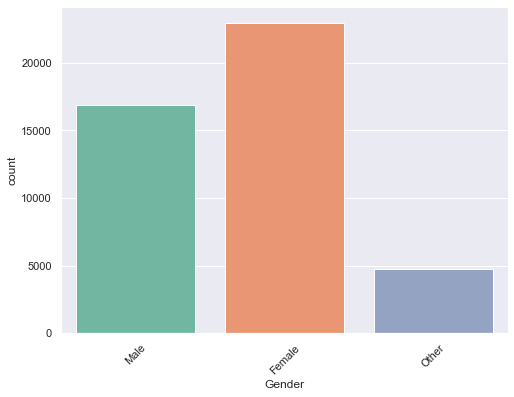

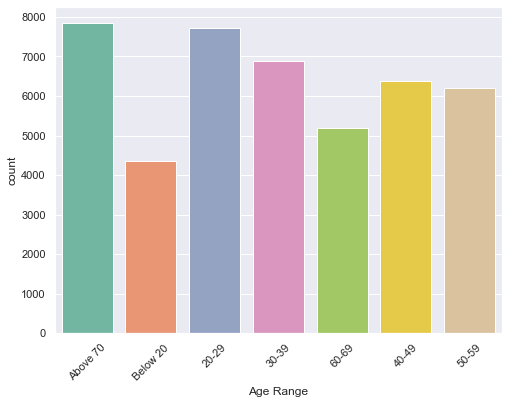

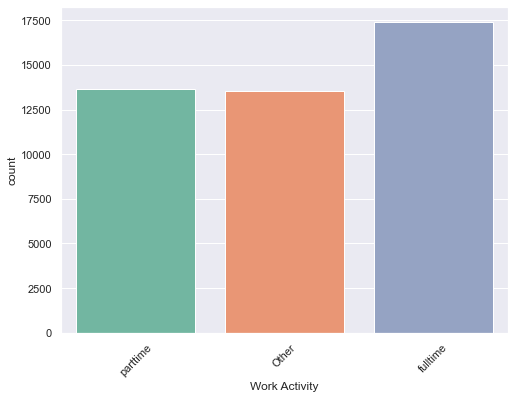

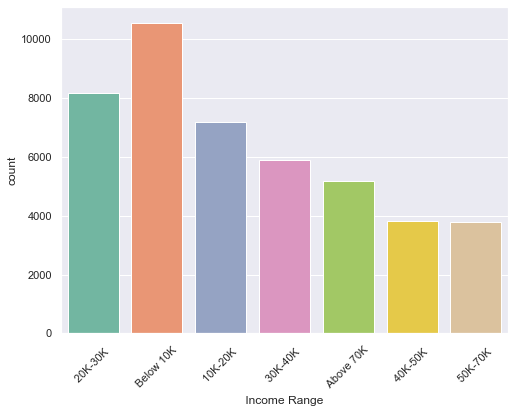

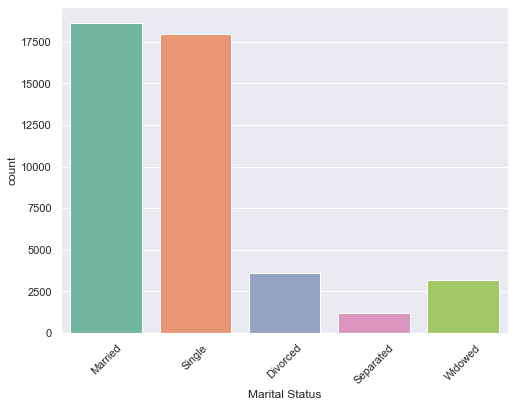

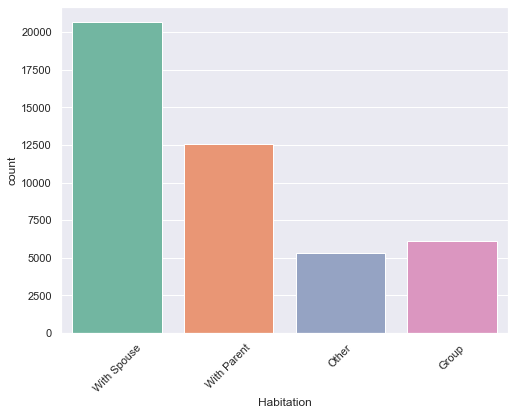

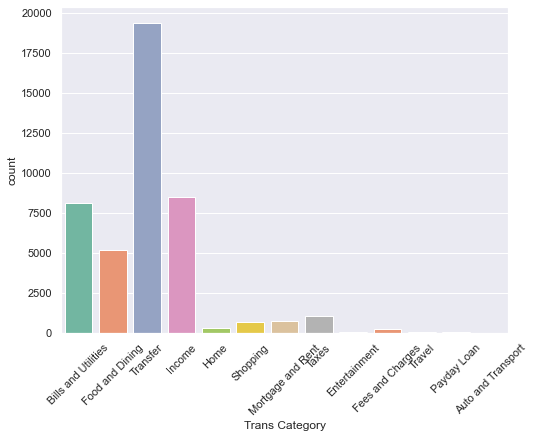

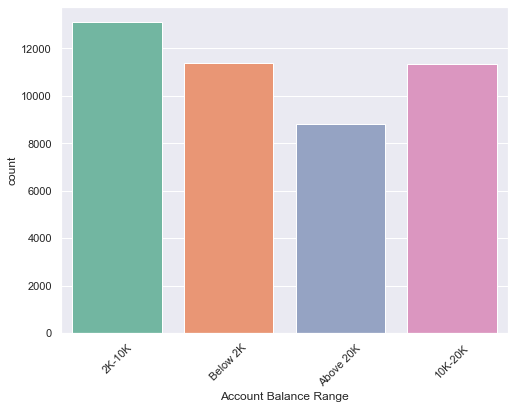

In [14]:
# Print graphs to visualize the number of customer per each feature
# Looping through all the features (with less than 11 unique values) by our y variable - see if there is relationship


features = ['Gender','Age Range', 'Work Activity',' Income Range ', 'Marital Status', 'Habitation','Trans Category','Account Balance Range']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set2')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    

### Numeric Representation

In [15]:
# Making categorical variables into numeric representation

print(raw_data.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
new_data = raw_data[features]
print(new_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(new_data, columns = features)



print(new_raw_data.shape)
# print the shape

new_raw_data.head()


(44612, 19)
(44612, 8)
(44612, 46)


,Gender_Female,Gender_Male,Gender_Other,Age Range_20-29,Age Range_30-39,Age Range_40-49,Age Range_50-59,Age Range_60-69,Age Range_Above 70,Age Range_Below 20,...,Trans Category_Mortgage and Rent,Trans Category_Payday Loan,Trans Category_Shopping,Trans Category_Taxes,Trans Category_Transfer,Trans Category_Travel,Account Balance Range_10K-20K,Account Balance Range_2K-10K,Account Balance Range_Above 20K,Account Balance Range_Below 2K
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
new_data.head()

,Gender,Age Range,Work Activity,Income Range,Marital Status,Habitation,Trans Category,Account Balance Range
0,Male,Above 70,parttime,20K-30K,Married,With Spouse,Bills and Utilities,2K-10K
1,Male,Above 70,parttime,20K-30K,Married,With Spouse,Bills and Utilities,2K-10K
2,Female,Below 20,Other,Below 10K,Single,With Parent,Food and Dining,Below 2K
3,Female,Below 20,Other,Below 10K,Single,With Parent,Food and Dining,Below 2K
4,Other,20-29,parttime,Below 10K,Single,With Parent,Food and Dining,2K-10K


### K-means Clustering

In [17]:
# Running Kmeans
# k is the number of clusters

X_train = new_raw_data.values  # turn the data frame to an array

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=300) #initialize the model by selecting random number of clusters 5 and random state
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia, which evaluates how close each values are to each other. 
# The smaller number of the inertia, the better the model is.
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [4 4 2 ... 4 4 4]
The Inertia is:  168295.75991641817


In [18]:
kmeans.labels_.shape

(44612,)

In [19]:
print(X_train) #array

[[0 1 0 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 [1 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]]


In [20]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 216212.71266424397
The innertia for : 3 Clusters is: 195859.96546028656
The innertia for : 4 Clusters is: 180950.2208600716
The innertia for : 5 Clusters is: 169566.91184783573
The innertia for : 6 Clusters is: 158023.15714880516
The innertia for : 7 Clusters is: 152086.06028716598
The innertia for : 8 Clusters is: 146479.0039767042
The innertia for : 9 Clusters is: 142148.8127684577
The innertia for : 10 Clusters is: 138454.48196097946
The innertia for : 11 Clusters is: 135271.28269007403
The innertia for : 12 Clusters is: 133068.14409156394
The innertia for : 13 Clusters is: 130800.09346768842
The innertia for : 14 Clusters is: 128406.83562134956
The innertia for : 15 Clusters is: 124865.58108567212
The innertia for : 16 Clusters is: 124500.79678975265
The innertia for : 17 Clusters is: 122248.30929633335
The innertia for : 18 Clusters is: 120556.9977113487
The innertia for : 19 Clusters is: 118979.82345468878


In [21]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

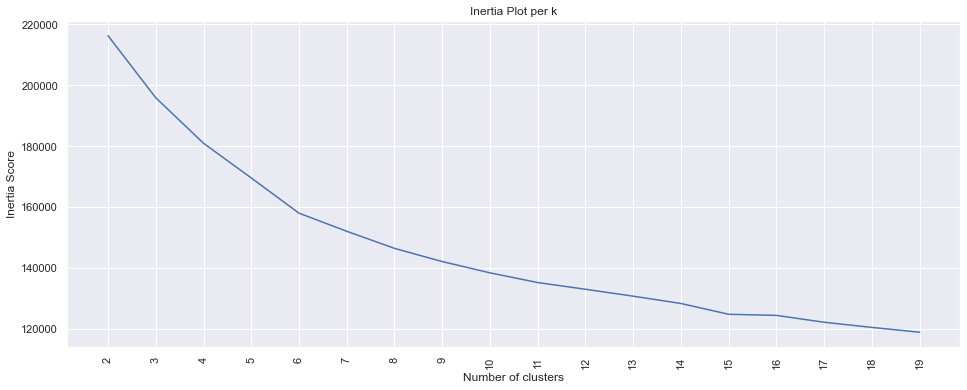

In [22]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [23]:
# From the graph we can see the slope becomes less steep at 5 clusters 
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,6009,6975,12678,9561,9389


In [24]:
new_raw_data.shape

(44612, 46)

### Running Principal Component Analysis (PCA) to Visualize & improve results

- What is it?

PCA is a dimensionality reduction technique that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables; called principal components

The goal of PCA is to extract the most important information from the data table by compressing the size of the data set and keeping only the important information; then PCA computes new variables called principal components.

- Additional Info:

The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia / variance of the data table; hence the less principal components you have the lower the inertia will be after PCA.

For every new component you add, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components; which are computed to be optimal
Therefore, inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be.
95% explained variance should be the criterium when choosing the number of principal components

Explained variance ratio (first two components): [0.193944 0.103546]


<Figure size 576x432 with 0 Axes>

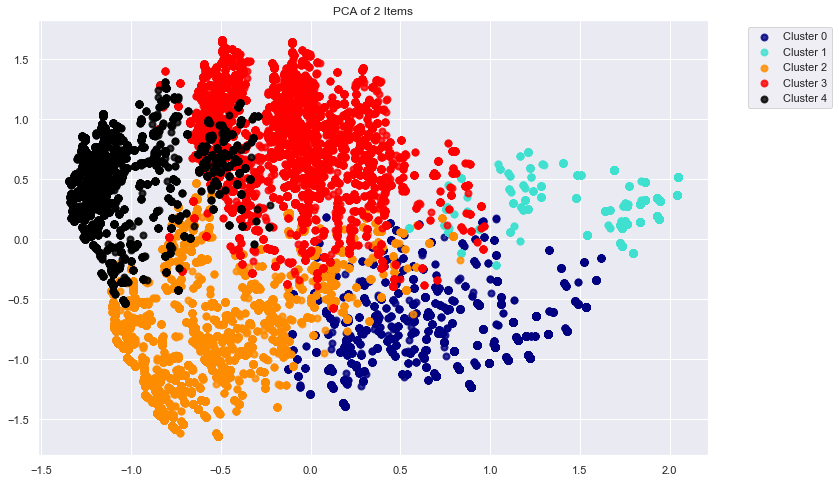

In [25]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

### Why dimensionality reduction could help k-means perform better:

Kmeans is extremely sensitive to scale, and when you have a lot of attributes there is no true scale anymore. 
This is where PCA comes in since it whitens your data.

By doing this, you will remove global correlation which can sometimes give better results. 
K-means is a "least squares" optimization problem; same with PCA.

Kmeans tries to find the least squares partition of the data while PCA finds the least squares cluster membership vector. 
The first eigenvector has the largest variance (smallest inertia), 
hence splitting on this vector (which shows the cluster membership - not input data coordinates) 
means maximization of cluster variance; better fit for Kmeans.

By maximizing between cluster variance, you minimize within-cluster variance. 
Therefore, applying PCA before clustering could potentially help you get better clusters (with more variance) in Kmeans

### Identifying the "best" number of components

Total Variance in our dataset is:  5.730681066838134
The 95% variance we want to have is:  5.444147013496227

Variance explain with 20 n_compononets:  5.262674425188653
Variance explain with 25 n_compononets:  5.535274991827408
Variance explain with 30 n_compononets:  5.677589754965781
Variance explain with 35 n_compononets:  5.72645311100188
Variance explain with 40 n_compononets:  5.730681066838134
Variance explain with 43 n_compononets:  5.730681066838134
Variance explain with 45 n_compononets:  5.730681066838134
Variance explain with 50 n_compononets:  5.730681066838134


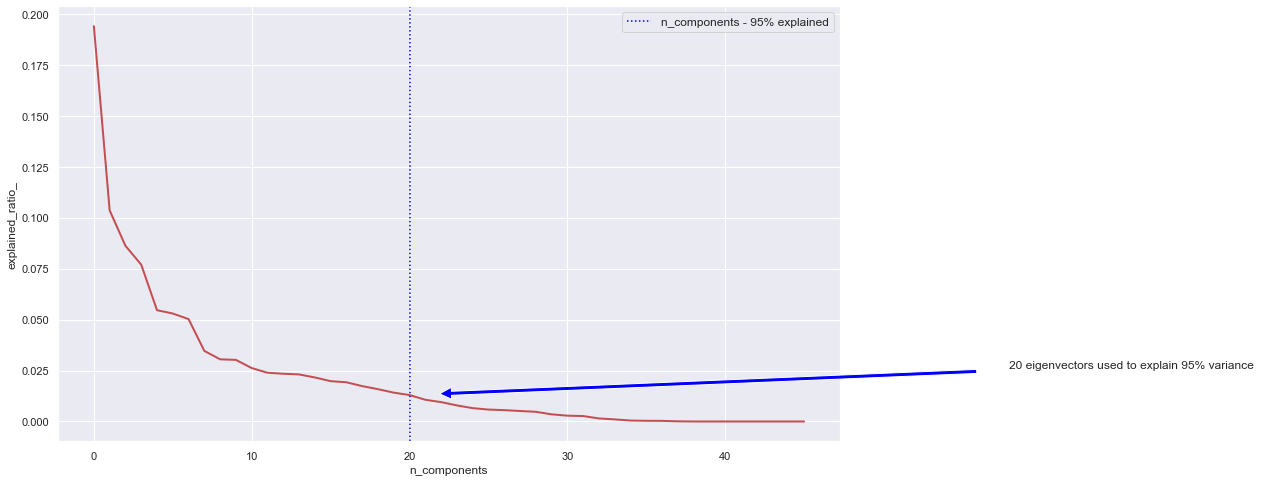

In [26]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 20 n_compononets: ", sum(a["Explained Variance"][0:20]))
print("Variance explain with 25 n_compononets: ", sum(a["Explained Variance"][0:25]))
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 43 n_compononets: ", sum(a["Explained Variance"][0:43]))
print("Variance explain with 45 n_compononets: ", sum(a["Explained Variance"][0:45]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(20,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('20 eigenvectors used to explain 95% variance', xy=(20, pca.explained_variance_ratio_[20]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()


The innertia for : 2 Clusters is: 195347.62944806492
The innertia for : 3 Clusters is: 175057.97733254376
The innertia for : 4 Clusters is: 160011.42866263076
The innertia for : 5 Clusters is: 147602.3824973263
The innertia for : 6 Clusters is: 137405.3565215734
The innertia for : 7 Clusters is: 131833.97560172027
The innertia for : 8 Clusters is: 126252.15901820092
The innertia for : 9 Clusters is: 122675.67158238178
The innertia for : 10 Clusters is: 118429.1683556062
The innertia for : 11 Clusters is: 115556.71323201316
The innertia for : 12 Clusters is: 112793.22064522636
The innertia for : 13 Clusters is: 110504.65955616535
The innertia for : 14 Clusters is: 108176.48982164994
The innertia for : 15 Clusters is: 106302.62944376725
The innertia for : 16 Clusters is: 103527.55178762357
The innertia for : 17 Clusters is: 102751.94302186671
The innertia for : 18 Clusters is: 100651.55168424113
The innertia for : 19 Clusters is: 99154.17428180669


Text(0.5, 1.0, 'Inertia Plot per k')

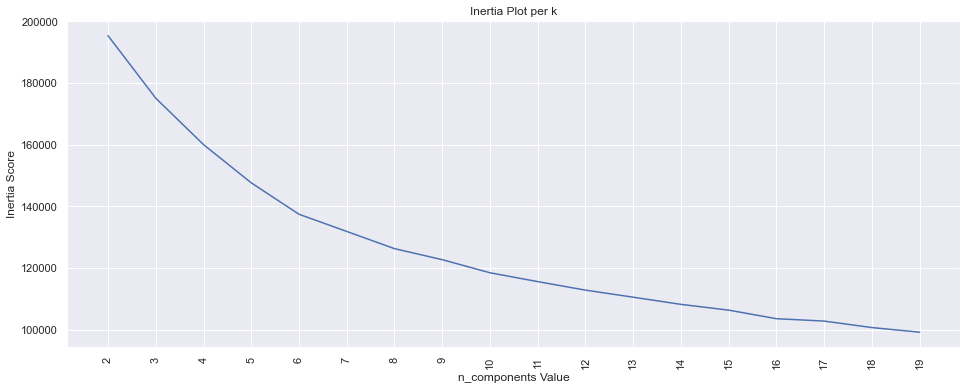

In [27]:
# Running PCA again

pca = PCA(n_components=20, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

We managed to improve the results by reducing inertia

In [28]:
# Running PCA with 36 PC
pca = PCA(n_components=20, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
raw_data['Clusters'] = clusters

# Creating a cluster Category
raw_data['Clusters Category'] = 'No Data'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 0] = 'Cluster 1'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 1] = 'Cluster 2'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 2] = 'Cluster 3'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 3] = 'Cluster 4'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 4] = 'Cluster 5'


raw_data.head(5)

C:\Users\karab\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Customer ID,Gender,DOB,Age,Age Range,Work Activity,Income,Income Range,Marital Status,Habitation,...,Trans Amount,Trans Date,Trans Category,Bank Branch,Account Type,Account Balance,Currency,Account Balance Range,Clusters,Clusters Category
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_3d5e4e2c-...,Male,1950-11-22,70,Above 70,parttime,"$20,267",20K-30K,Married,With Spouse,...,105.77,2018-10-01,Bills and Utilities,538,DDA,"$2,548",CAD,2K-10K,4,Cluster 5
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_3d5e4e2c-...,Male,1950-11-22,70,Above 70,parttime,"$20,267",20K-30K,Married,With Spouse,...,105.77,2018-10-01,Bills and Utilities,538,SDA,"$8,307",CAD,2K-10K,4,Cluster 5
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_824bb9f0-...,Female,2003-1-28,17,Below 20,Other,$-,Below 10K,Single,With Parent,...,6.57,2018-09-28,Food and Dining,252,DDA,$31,CAD,Below 2K,2,Cluster 3
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_824bb9f0-...,Female,2003-1-28,17,Below 20,Other,$-,Below 10K,Single,With Parent,...,6.57,2018-09-28,Food and Dining,252,SDA,$115,CAD,Below 2K,2,Cluster 3
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_465e0645-...,Other,1999-1-28,21,20-29,parttime,"$7,936",Below 10K,Single,With Parent,...,2.65,2018-06-05,Food and Dining,1198,DDA,"$5,817",CAD,2K-10K,0,Cluster 1


In [29]:
raw_data.columns

Index(['Customer ID', 'Gender', 'DOB', 'Age', 'Age Range', 'Work Activity',
       ' Income ', ' Income Range ', 'Marital Status', 'Habitation',
       'Trans Description', 'Trans Amount', 'Trans Date', 'Trans Category',
       'Bank Branch', 'Account Type', ' Account Balance ', 'Currency',
       'Account Balance Range', 'Clusters', 'Clusters Category'],
      dtype='object')

In [32]:
# Creating an order for Income

raw_data['Income Order'] = 0
raw_data['Income Order'].loc[raw_data[' Income Range '] == ' Below 10K '] = 1
raw_data['Income Order'].loc[raw_data[' Income Range '] == ' 10K-20K  '] = 2
raw_data['Income Order'].loc[raw_data[' Income Range '] == ' 20K-30K  '] = 3
raw_data['Income Order'].loc[raw_data[' Income Range '] == ' 30K-40K  '] = 4
raw_data['Income Order'].loc[raw_data[' Income Range '] == ' 40K-50K  '] = 5
raw_data['Income Order'].loc[raw_data[' Income Range '] == ' 50K-70K  '] = 6
raw_data['Income Order'].loc[raw_data[' Income Range '] == ' Above 70K '] = 7

# Creating an order for Account Balance Range
raw_data['Account Balance Range Order'] = 0
raw_data['Account Balance Range Order'].loc[raw_data['Account Balance Range'] == 'Below 2K'] = 1
raw_data['Account Balance Range Order'].loc[raw_data['Account Balance Range'] == '2K-10K'] = 2
raw_data['Account Balance Range Order'].loc[raw_data['Account Balance Range'] == '10K-20K'] = 3
raw_data['Account Balance Range Order'].loc[raw_data['Account Balance Range'] == 'Above 20K'] = 4

# Creating an order for Age Range
raw_data['Age Range Order'] = 0
raw_data['Age Range Order'].loc[raw_data['Age Range'] == 'Below 20'] = 1
raw_data['Age Range Order'].loc[raw_data['Age Range'] == '20 - 29'] = 2
raw_data['Age Range Order'].loc[raw_data['Age Range'] == '30 - 39'] = 3
raw_data['Age Range Order'].loc[raw_data['Age Range'] == '40 - 49'] = 4
raw_data['Age Range Order'].loc[raw_data['Age Range'] == '50 - 59'] = 5
raw_data['Age Range Order'].loc[raw_data['Age Range'] == '60 - 69'] = 6
raw_data['Age Range Order'].loc[raw_data['Age Range'] == 'Above 70'] = 7

# Creating an order for Habitation
raw_data['Habitation Order'] = 0
raw_data['Habitation Order'].loc[raw_data['Habitation'] == 'With Parent'] = 1
raw_data['Habitation Order'].loc[raw_data['Habitation'] == 'With Spouse'] = 2
raw_data['Habitation Order'].loc[raw_data['Habitation'] == 'Group'] = 3
raw_data['Habitation Order'].loc[raw_data['Habitation'] == 'Other'] = 4

# Creating an order for Marital Status
raw_data['Marital Status Order'] = 0
raw_data['Marital Status Order'].loc[raw_data['Marital Status'] == 'Single'] = 1
raw_data['Marital Status Order'].loc[raw_data['Marital Status'] == 'Married'] = 2
raw_data['Marital Status Order'].loc[raw_data['Marital Status'] == 'Separated'] = 3
raw_data['Marital Status Order'].loc[raw_data['Marital Status'] == 'Divorced'] = 4
raw_data['Marital Status Order'].loc[raw_data['Marital Status'] == 'Widowed'] = 5

# Creating an order for Work Activity
raw_data['Work Activity Order'] = 0
raw_data['Work Activity Order'] .loc[raw_data['Work Activity'] == 'fulltime'] = 1
raw_data['Work Activity Order'] .loc[raw_data['Work Activity'] == 'parttime'] = 1
raw_data['Work Activity Order'] .loc[raw_data['Work Activity'] == 'Other'] = 1


C:\Users\karab\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
# Exporting the data in a CSV

raw_data.to_csv('Bank_Cluster_Output.csv', sep=',')

In [35]:
raw_data.head()

,Customer ID,Gender,DOB,Age,Age Range,Work Activity,Income,Income Range,Marital Status,Habitation,...,Currency,Account Balance Range,Clusters,Clusters Category,Income Order,Account Balance Range Order,Age Range Order,Habitation Order,Marital Status Order,Work Activity Order
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_3d5e4e2c-...,Male,1950-11-22,70,Above 70,parttime,"$20,267",20K-30K,Married,With Spouse,...,CAD,2K-10K,4,Cluster 5,3,2,7,2,2,1
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_3d5e4e2c-...,Male,1950-11-22,70,Above 70,parttime,"$20,267",20K-30K,Married,With Spouse,...,CAD,2K-10K,4,Cluster 5,3,2,7,2,2,1
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_824bb9f0-...,Female,2003-1-28,17,Below 20,Other,$-,Below 10K,Single,With Parent,...,CAD,Below 2K,2,Cluster 3,1,1,1,1,1,1
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_824bb9f0-...,Female,2003-1-28,17,Below 20,Other,$-,Below 10K,Single,With Parent,...,CAD,Below 2K,2,Cluster 3,1,1,1,1,1,1
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_465e0645-...,Other,1999-1-28,21,20-29,parttime,"$7,936",Below 10K,Single,With Parent,...,CAD,2K-10K,0,Cluster 1,1,2,0,1,1,1
